In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 18 10:26:42 2024

@author: eveomett

Author: Ellen Veomett

for AI for Redistricting

Lab 3, spring 2024
"""

import matplotlib.pyplot as plt
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain, Election
from gerrychain.updaters import cut_edges, Tally
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial
import time
start_time = time.time()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [41]:
state_ab = "co"

In [42]:
il_graph = Graph.from_json("./{}/{}.json".format(state_ab, state_ab))

# CDelection_df

In [43]:
cutedge_ensemble = []
dem_ensemble = []

# Create an initial partition
initial_partition = Partition(
    il_graph,
    assignment="CD", # change it to SEND / HDIST
    updaters={
        "Dem": Election(
            "2020 presidential", {"Dem": "PRE20D", "Rep": "PRE20R"}, alias="Dem"
        ),
        "total population": Tally("TOTPOP", alias="total population"),
        "latino population": Tally("HISP", alias="latino population"),
        "cut_edges": cut_edges,
    },
)

print(initial_partition)

<Partition [8 parts]>


In [44]:
num_dist = len(initial_partition)
total_pop = sum([il_graph.nodes()[v]["TOTPOP"] for v in il_graph.nodes()])
ideal_pop = total_pop / num_dist
pop_toleration = 0.05

In [45]:
# Create a proposal
proposal = partial(
    recom,
    pop_col="TOTPOP",
    pop_target=ideal_pop,
    epsilon=pop_toleration,
    node_repeats=2,
)

population_constraint = constraints.within_percent_of_ideal_population(
    initial_partition, pop_toleration, pop_key="total population"
)

In [46]:
# Create a Markov chain
chain = MarkovChain(
    proposal=proposal,
    constraints=[population_constraint],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=600,  # choosing 6000 because i tried 1,000 and it was not enough. also tried 10,000 and it was kinda similar to 6,000. so i decided to go with 6,000..
)

In [47]:
for part in chain:
    cutedge_ensemble.append(len(part["cut_edges"]))
    dem_ensemble.append(part["Dem"].wins("Dem"))

The time of execution of above program is : 1602.2749456644058 mins


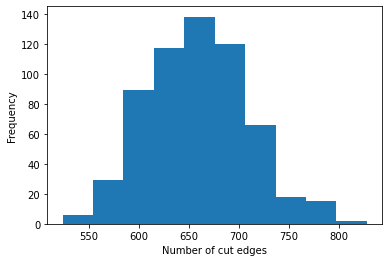

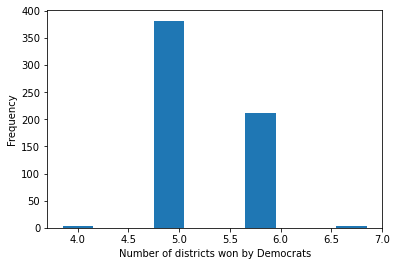

In [48]:
# Draw histogram of number of cut edges in the plan
plt.figure()
plt.hist(cutedge_ensemble, align="left")
plt.xlabel("Number of cut edges")
plt.ylabel("Frequency")
plt.savefig("cutedge_ensemble.png")

# Draw histogram of number of districts won by Democrats
plt.figure()
plt.hist(dem_ensemble, align="left")
plt.xlabel("Number of districts won by Democrats")
plt.ylabel("Frequency")
plt.savefig("democrate_ensemble.png")

end_time = time.time()
print("The time of execution of above program is :",
      (end_time-start_time)/60, "mins")

# SEND

In [49]:
cutedge_ensemble = []
dem_ensemble = []

# Create an initial partition
initial_partition = Partition(
    il_graph,
    assignment="SEND", # change it to SEND / HDIST
    updaters={
        "Dem": Election(
            "2020 presidential", {"Dem": "PRE20D", "Rep": "PRE20R"}, alias="Dem"
        ),
        "total population": Tally("TOTPOP", alias="total population"),
        "latino population": Tally("HISP", alias="latino population"),
        "cut_edges": cut_edges,
    },
)

print(initial_partition)

<Partition [35 parts]>


In [50]:
num_dist = len(initial_partition)
total_pop = sum([il_graph.nodes()[v]["TOTPOP"] for v in il_graph.nodes()])
ideal_pop = total_pop / num_dist
pop_toleration = 0.5

In [51]:
# Create a proposal
proposal = partial(
    recom,
    pop_col="TOTPOP",
    pop_target=ideal_pop,
    epsilon=pop_toleration,
    node_repeats=2,
)

population_constraint = constraints.within_percent_of_ideal_population(
    initial_partition, pop_toleration, pop_key="total population"
)

In [52]:
# Create a Markov chain
chain = MarkovChain(
    proposal=proposal,
    constraints=[population_constraint],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=600,  # choosing 6000 because i tried 1,000 and it was not enough. also tried 10,000 and it was kinda similar to 6,000. so i decided to go with 6,000..
)

In [53]:
for part in chain:
    cutedge_ensemble.append(len(part["cut_edges"]))
    dem_ensemble.append(part["Dem"].wins("Dem"))

The time of execution of above program is : 1602.5710595965386 mins


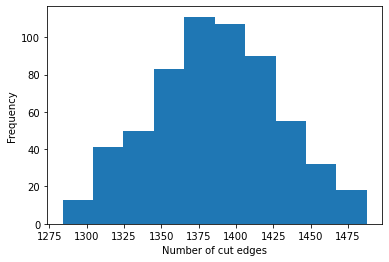

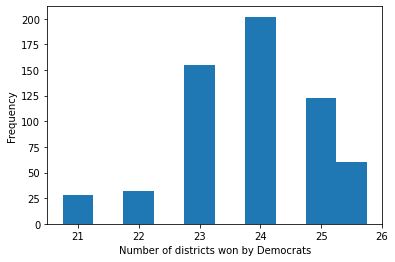

In [54]:
# Draw histogram of number of cut edges in the plan
plt.figure()
plt.hist(cutedge_ensemble, align="left")
plt.xlabel("Number of cut edges")
plt.ylabel("Frequency")
plt.savefig("cutedge_ensemble.png")

# Draw histogram of number of districts won by Democrats
plt.figure()
plt.hist(dem_ensemble, align="left")
plt.xlabel("Number of districts won by Democrats")
plt.ylabel("Frequency")
plt.savefig("democrate_ensemble.png")

end_time = time.time()
print("The time of execution of above program is :",
      (end_time-start_time)/60, "mins")

# HDIST

In [55]:
cutedge_ensemble = []
dem_ensemble = []


# Create an initial partition
initial_partition = Partition(
    il_graph,
    assignment="HDIST", # change it to SEND / HDIST
    updaters={
        "Dem": Election(
            "2020 presidential", {"Dem": "PRE20D", "Rep": "PRE20R"}, alias="Dem"
        ),
        "total population": Tally("TOTPOP", alias="total population"),
        "latino population": Tally("HISP", alias="latino population"),
        "cut_edges": cut_edges,
    },
)

print(initial_partition)

<Partition [65 parts]>


In [56]:
num_dist = len(initial_partition)
total_pop = sum([il_graph.nodes()[v]["TOTPOP"] for v in il_graph.nodes()])
ideal_pop = total_pop / num_dist
pop_toleration = 0.9

In [57]:
# Create a proposal
proposal = partial(
    recom,
    pop_col="TOTPOP",
    pop_target=ideal_pop,
    epsilon=pop_toleration,
    node_repeats=2,
)

population_constraint = constraints.within_percent_of_ideal_population(
    initial_partition, pop_toleration, pop_key="total population"
)

In [58]:
# Create a Markov chain
chain = MarkovChain(
    proposal=proposal,
    constraints=[population_constraint],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=600,  # choosing 6000 because i tried 1,000 and it was not enough. also tried 10,000 and it was kinda similar to 6,000. so i decided to go with 6,000..
)

In [59]:
for part in chain:
    cutedge_ensemble.append(len(part["cut_edges"]))
    dem_ensemble.append(part["Dem"].wins("Dem"))

The time of execution of above program is : 1602.92655586799 mins


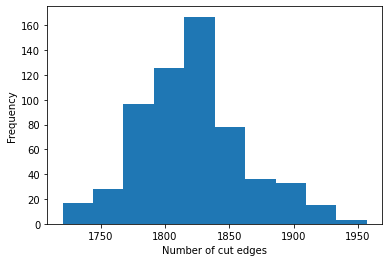

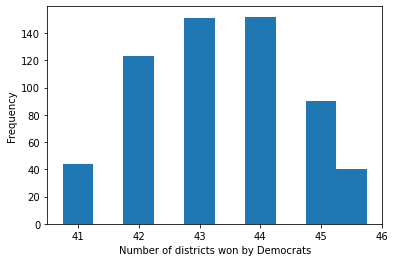

In [60]:
# Draw histogram of number of cut edges in the plan
plt.figure()
plt.hist(cutedge_ensemble, align="left")
plt.xlabel("Number of cut edges")
plt.ylabel("Frequency")
plt.savefig("cutedge_ensemble.png")

# Draw histogram of number of districts won by Democrats
plt.figure()
plt.hist(dem_ensemble, align="left")
plt.xlabel("Number of districts won by Democrats")
plt.ylabel("Frequency")
plt.savefig("democrate_ensemble.png")

end_time = time.time()
print("The time of execution of above program is :",
      (end_time-start_time)/60, "mins")